In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
from glob import glob

In [230]:
results = {}
for i, fname in enumerate(glob('bootstrap_cb_result_*.csv')):
    results[i] = pd.read_csv(fname, index_col=0).sort_values('g')  # Sorting is important

In [233]:
h = pd.concat(results)

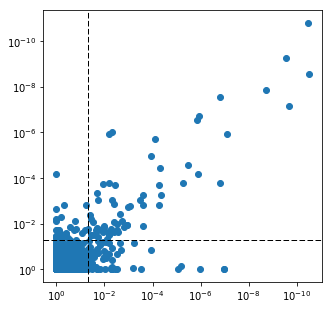

In [266]:
plt.loglog()

plt.scatter(h.loc[0]['qval'],
            h.loc[1]['qval']);

plt.gca().invert_xaxis();
plt.gca().invert_yaxis();

plt.axhline(0.05, lw=1, c='k', ls='--')
plt.axvline(0.05, lw=1, c='k', ls='--');

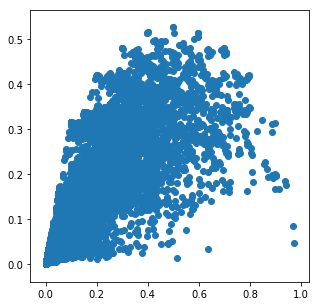

In [267]:
plt.scatter(h.groupby('g')['fraction_spatial_variance'].mean(),
            h.groupby('g')['fraction_spatial_variance'].std());

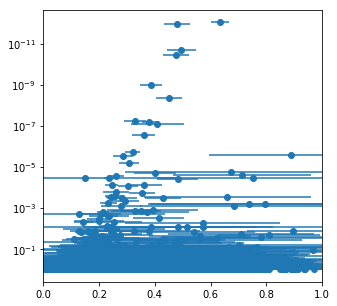

In [277]:
plt.yscale('log')
plt.errorbar(h.groupby('g')['fraction_spatial_variance'].mean(),
             h.loc[3]['qval'],
             xerr=h.groupby('g')['fraction_spatial_variance'].std(), fmt='o')

plt.gca().invert_yaxis();
plt.xlim(0, 1);

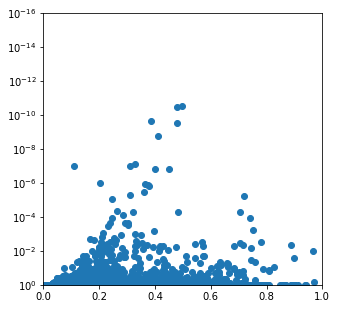

In [294]:
plt.yscale('log')

plt.scatter(h.groupby('g')['fraction_spatial_variance'].mean(),
             h.loc[0]['qval'],)


plt.xlim(0, 1);
plt.ylim(1e-16, 1.)
plt.gca().invert_yaxis();

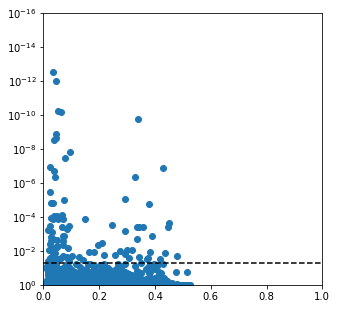

In [296]:
plt.yscale('log')

plt.scatter(h.groupby('g')['fraction_spatial_variance'].std(),
             h.loc[2]['qval'],)

plt.ylim(1e-16, 1.)

plt.gca().invert_yaxis();
plt.xlim(0, 1);

plt.axhline(0.05, c='k', ls='--');